### Undergraduate Thesis Project

>**Predicting Deadlock (Run-time Error) in Concurrent Systems**
>
>**Preprocessing Part**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE 

In [2]:
df = pd.read_csv('./Dataset.csv')
df.head()

,Index,Call_1,Call_2,Call_3,Call_4,Call_5,Call_6,Call_7,Call_8,Func_Call_1,Func_Call_2,Func_Call_3,Func_Call_4,Deadlock
0,1,1,2,2,3,3,1,3,1,0,3,2,3,1.0
1,2,3,1,0,0,2,3,3,1,2,2,1,3,1.0
2,3,3,3,3,0,2,0,1,1,2,2,1,3,1.0
3,4,3,0,1,0,1,1,2,2,2,3,2,1,1.0
4,5,2,2,3,3,1,3,0,1,1,2,2,3,1.0


In [3]:
df1 = df[df['Deadlock'].notna()]
df2 = df1[df1['Deadlock'] != -1]
df3 = df2.copy()
df3['Deadlock'] = df2['Deadlock'].map({1 : 'Yes', 0 : 'No'})
del df3['Index']
newDf = df3.reset_index()

newDf.head()

,index,Call_1,Call_2,Call_3,Call_4,Call_5,Call_6,Call_7,Call_8,Func_Call_1,Func_Call_2,Func_Call_3,Func_Call_4,Deadlock
0,0,1,2,2,3,3,1,3,1,0,3,2,3,Yes
1,1,3,1,0,0,2,3,3,1,2,2,1,3,Yes
2,2,3,3,3,0,2,0,1,1,2,2,1,3,Yes
3,3,3,0,1,0,1,1,2,2,2,3,2,1,Yes
4,4,2,2,3,3,1,3,0,1,1,2,2,3,Yes


In [4]:
newDf.shape

(333, 14)

In [5]:
##### FOR OVER/UNDER SAMPLING AFTER COMPLETING DATASET

# sm = SMOTE(random_state=42)
# cols = list(newDf.columns)
# cols.remove('Deadlock')

# features = np.array(list(newDf.loc[:, cols].copy()))
# features, newDf['Deadlock'] = sm.fit_resample(features, newDf['Deadlock'])   

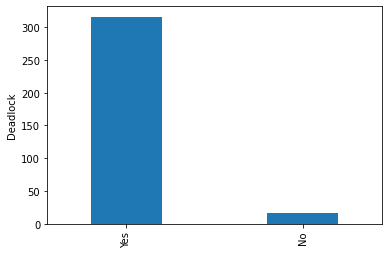

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111)
width = 0.4
newDf['Deadlock'].value_counts().plot(kind='bar', ax=ax, width = width)
ax.set_ylabel('Deadlock')
plt.show()

In [7]:
yesCount = newDf['Deadlock'].value_counts()['Yes']
noCount = newDf['Deadlock'].value_counts()['No']
allCount = yesCount + noCount
print('Yes Percentage:', yesCount/allCount)
print('No Percentage:', noCount/allCount)

Yes Percentage: 0.948948948948949
No Percentage: 0.05105105105105105


In [8]:
oneHotDf = pd.DataFrame()

for i in range(1,9):
    dfTemp = pd.get_dummies(newDf['Call_'+str(i)], prefix='Call_'+str(i)+'_fork')
    for col in dfTemp.columns:
        oneHotDf[col] = dfTemp[col]

for i in range(1,5):
    oneHotDf['Func_Call_'+str(i)] = newDf['Func_Call_'+str(i)]
    
oneHotDf['Deadlock_0'] = newDf['Deadlock'].map({'Yes' : 1, 'No' : 0})
oneHotDf['Deadlock_1'] = newDf['Deadlock'].map({'Yes' : 0, 'No' : 1})

oneHotDf.head()

,Call_1_fork_0,Call_1_fork_1,Call_1_fork_2,Call_1_fork_3,Call_2_fork_0,Call_2_fork_1,Call_2_fork_2,Call_2_fork_3,Call_3_fork_0,Call_3_fork_1,...,Call_8_fork_0,Call_8_fork_1,Call_8_fork_2,Call_8_fork_3,Func_Call_1,Func_Call_2,Func_Call_3,Func_Call_4,Deadlock_0,Deadlock_1
0,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,0,3,2,3,1,0
1,0,0,0,1,0,1,0,0,1,0,...,0,1,0,0,2,2,1,3,1,0
2,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,2,2,1,3,1,0
3,0,0,0,1,1,0,0,0,0,1,...,0,0,1,0,2,3,2,1,1,0
4,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,1,2,2,3,1,0


In [9]:
oneHotDf.to_csv('one_hot_RebecaDataset.csv', index=False)